In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

file_path = '/content/sample_data/Zoo.csv'
df = pd.read_csv(file_path)

In [20]:
print(df.info())
print(df.isnull().sum())

if 'animal_name' in df.columns:
    df.drop(columns=['animal_name'], inplace=True)

y = df['type']
y = LabelEncoder().fit_transform(y)

if 'animal name' in df.columns:
    df.drop(columns=['animal name'], inplace=True)

X = df.drop(columns=['type'])
X = X.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB
None
hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomou

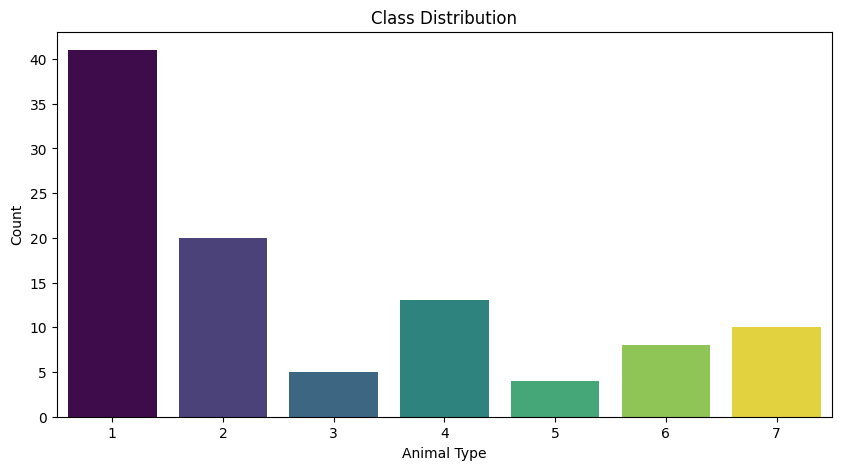

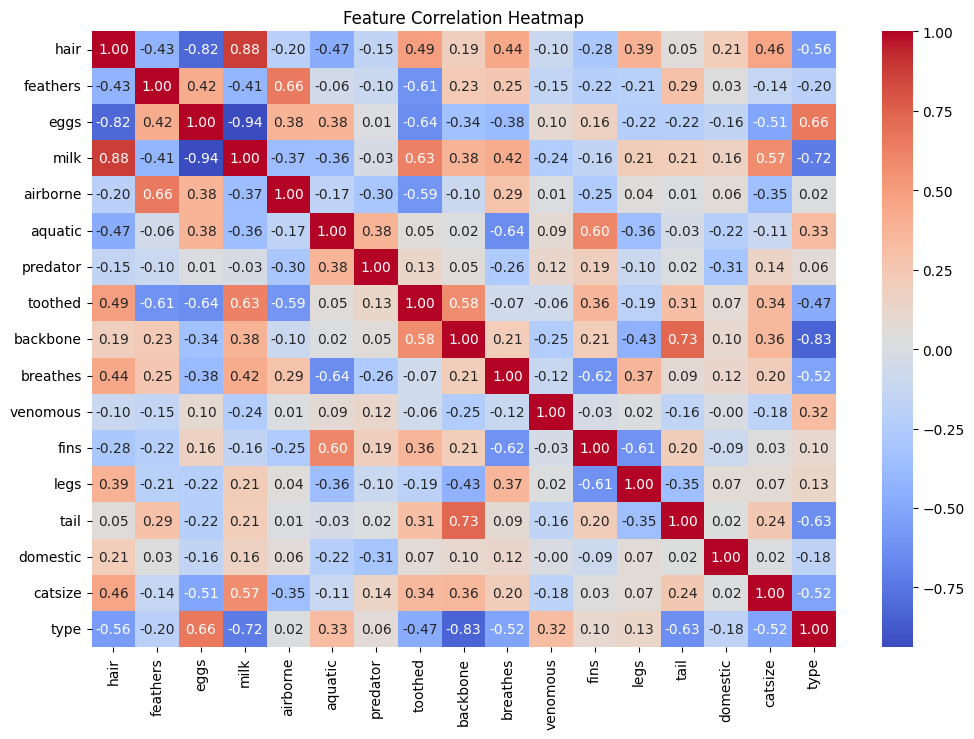

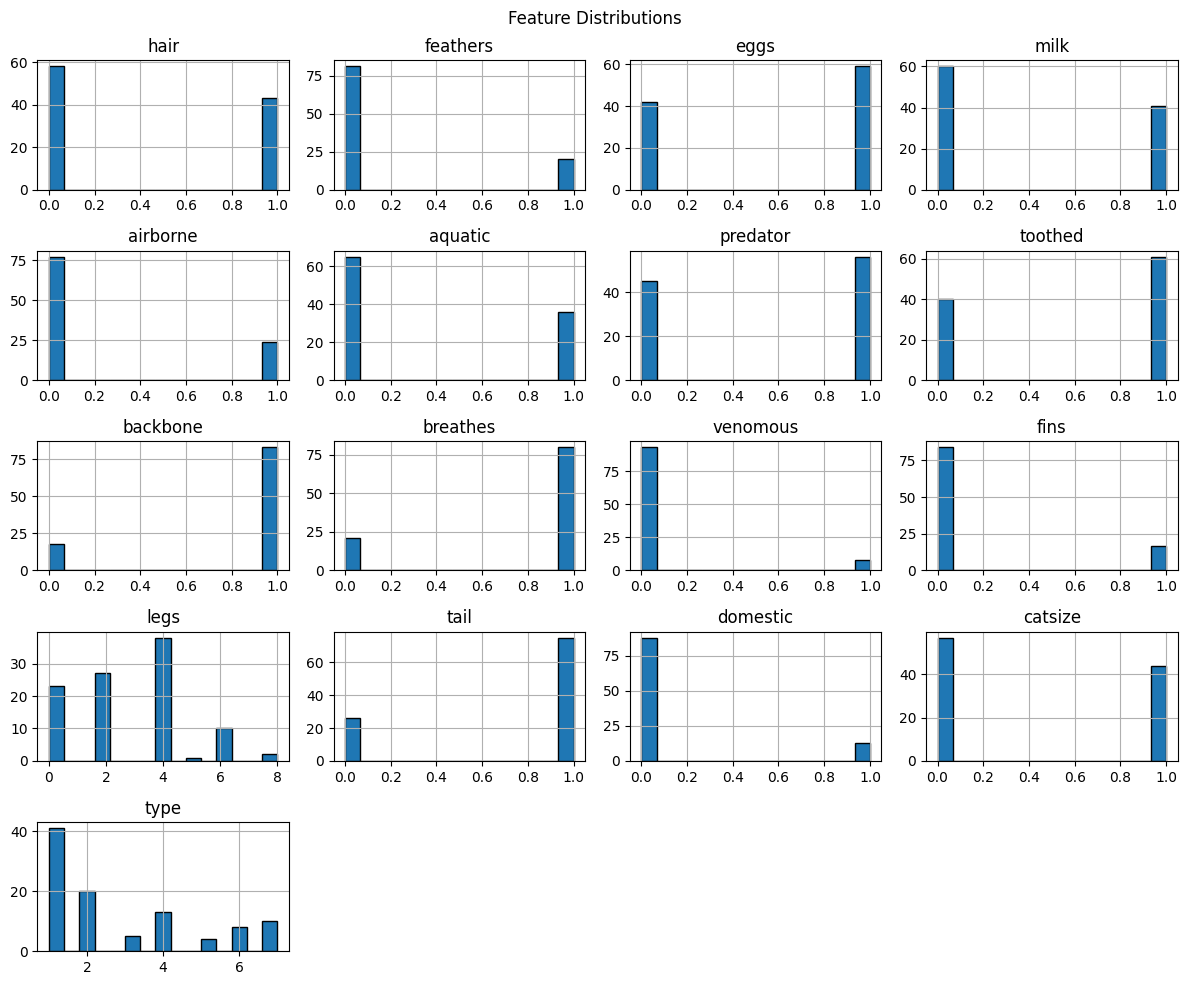

In [18]:
# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df, palette='viridis', hue='type', legend=False)
plt.title('Class Distribution')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature Distributions
df.drop(columns=['animal name'], inplace=True, errors='ignore')  # Dropping non-numeric column if exists
df.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

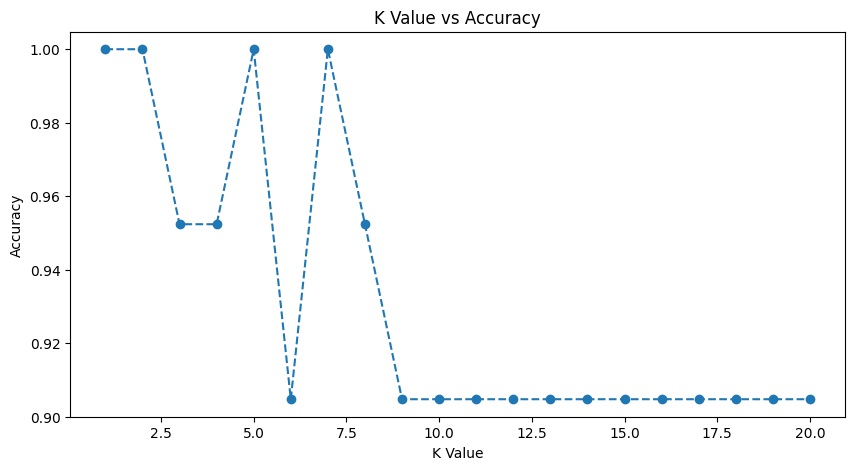

Optimal K: 1
Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


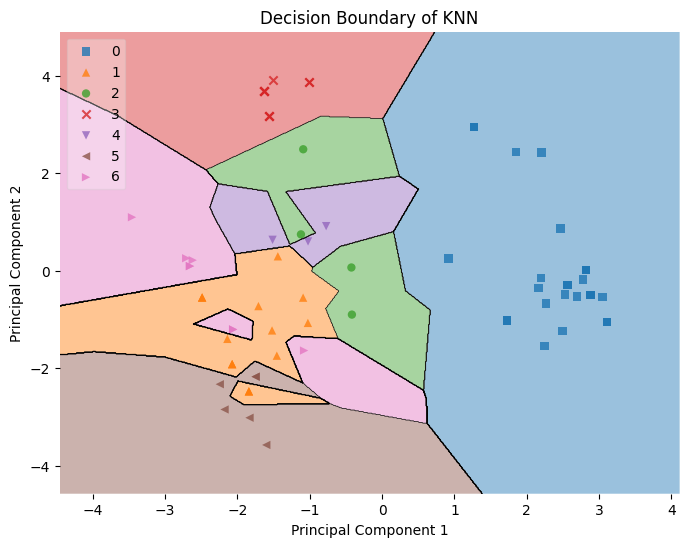

In [21]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Finding the best K value
accuracies = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting accuracy vs K value
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='dashed')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K Value vs Accuracy')
plt.show()

# Selecting optimal K
optimal_k = k_range[np.argmax(accuracies)]
print(f'Optimal K: {optimal_k}')

# Implementing KNN with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing decision boundary
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_pca, y_train, clf=knn_pca, legend=2, scatter_kwargs={'edgecolor': 'none'})
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary of KNN')
plt.show()


1. What are the key hyperparameters in KNN?

  The key hyperparameters in K-Nearest Neighbors include K (number of neighbors), which determines how many nearest points influence classification. Distance metric, which defines how distances between points are measured; and weighting strategy, where neighbors can be weighted equally or based on their distance. Additionally, the algorithm used for nearest neighbor search (e.g., brute-force or KD-Tree) and leaf size (for tree-based searches) can impact computational efficiency. Tuning these hyperparameters is crucial for optimizing model performance.

2. What distance metrics can be used in KNN?

  In KNN, various distance metrics can be used to measure the similarity between data points. The most common ones are Euclidean distance, which calculates the straight-line distance between two points; Manhattan distance, which sums the absolute differences in each dimension; and Minkowski distance, a generalization of both Euclidean and Manhattan distances. Other metrics include Chebyshev distance, which takes the maximum absolute difference along any coordinate dimension; Cosine similarity, which measures the cosine of the angle between two vectors, often used in text data; Hamming distance, used for categorical data to count differing positions.